# PYTHOM IMPLEMENTATION

Problem Statement:


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv("C:/Users/ankus/Downloads/Train.csv")
df_test=pd.read_csv("C:/Users/ankus/Downloads/Test.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#df_test.head()

In [4]:
print(df_train.shape,df_test.shape)

(8523, 12) (5681, 11)


In [5]:
#checking null values
print(df_train.isnull().sum(),df_test.isnull().sum())


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [6]:
#replacing null values
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
df_test['Item_Weight']=df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [9]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [11]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [48]:
#"iten fat column" have data of same value in differnt type so combime them

#for train data
df_train['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat', inplace=True)
df_train['Item_Fat_Content'].replace('reg','Regular', inplace=True)

#for test data
df_test['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat', inplace=True)
df_test['Item_Fat_Content'].replace('reg','Regular', inplace=True)

# Label Encoding

In [13]:
#do label encoding for the train data set
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Item_Fat_Content']=le.fit_transform(df_train['Item_Fat_Content'])
df_train['Outlet_Location_Type']=le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']=le.fit_transform(df_train['Outlet_Type'])
df_train['Item_Type']=le.fit_transform(df_train['Item_Type'])
df_train['Item_Fat_Content']=le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Identifier']=le.fit_transform(df_train['Item_Identifier'])
df_train['Outlet_Identifier']=le.fit_transform(df_train['Outlet_Identifier'])
df_train['Outlet_Size']=le.fit_transform(df_train['Outlet_Size'])


#do label encoding for the test data set
df_test['Item_Fat_Content']=le.fit_transform(df_test['Item_Fat_Content'])
df_test['Outlet_Location_Type']=le.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type']=le.fit_transform(df_test['Outlet_Type'])
df_test['Item_Type']=le.fit_transform(df_test['Item_Type'])
df_test['Item_Fat_Content']=le.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Identifier']=le.fit_transform(df_test['Item_Identifier'])
df_test['Outlet_Identifier']=le.fit_transform(df_test['Outlet_Identifier'])
df_test['Outlet_Size']=le.fit_transform(df_test['Outlet_Size'])

In [14]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [15]:
#df_test.head()

In [16]:
#drop unwanted columns
df_train=df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
df_test=df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [17]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [18]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,1,1,1
2,14.600000,0,0.099575,11,241.7538,1998,1,2,0
3,7.315000,0,0.015388,13,155.0340,2007,1,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,1,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,0,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,1,0.000000,3,214.6218,2007,1,1,1


# Target Variable

In [19]:
x=df_train.drop(['Item_Outlet_Sales'],axis=1)
y=df_train['Item_Outlet_Sales']

In [20]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,1999,1,0,1
3,19.200,1,0.000000,6,182.0950,1998,1,2,0
4,8.930,0,0.000000,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2


In [21]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Correlation

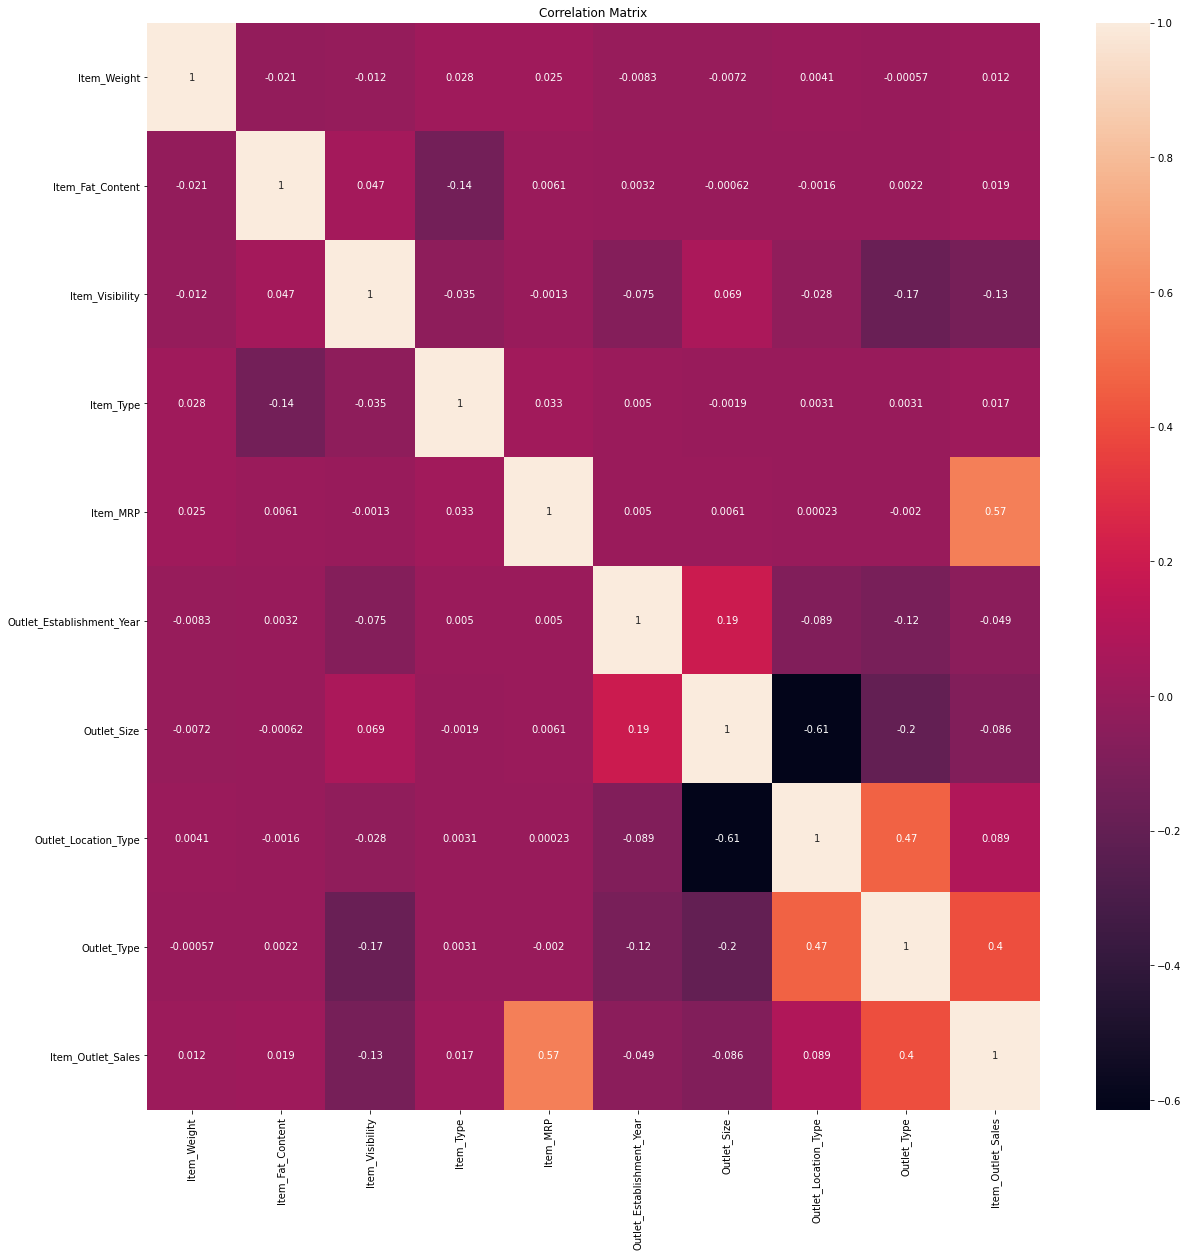

In [22]:
corr_mat=df_train.corr()

#size of the canvas
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [23]:
corr_mat["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Location_Type         0.089367
Item_Fat_Content             0.018719
Item_Type                    0.017048
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.086182
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

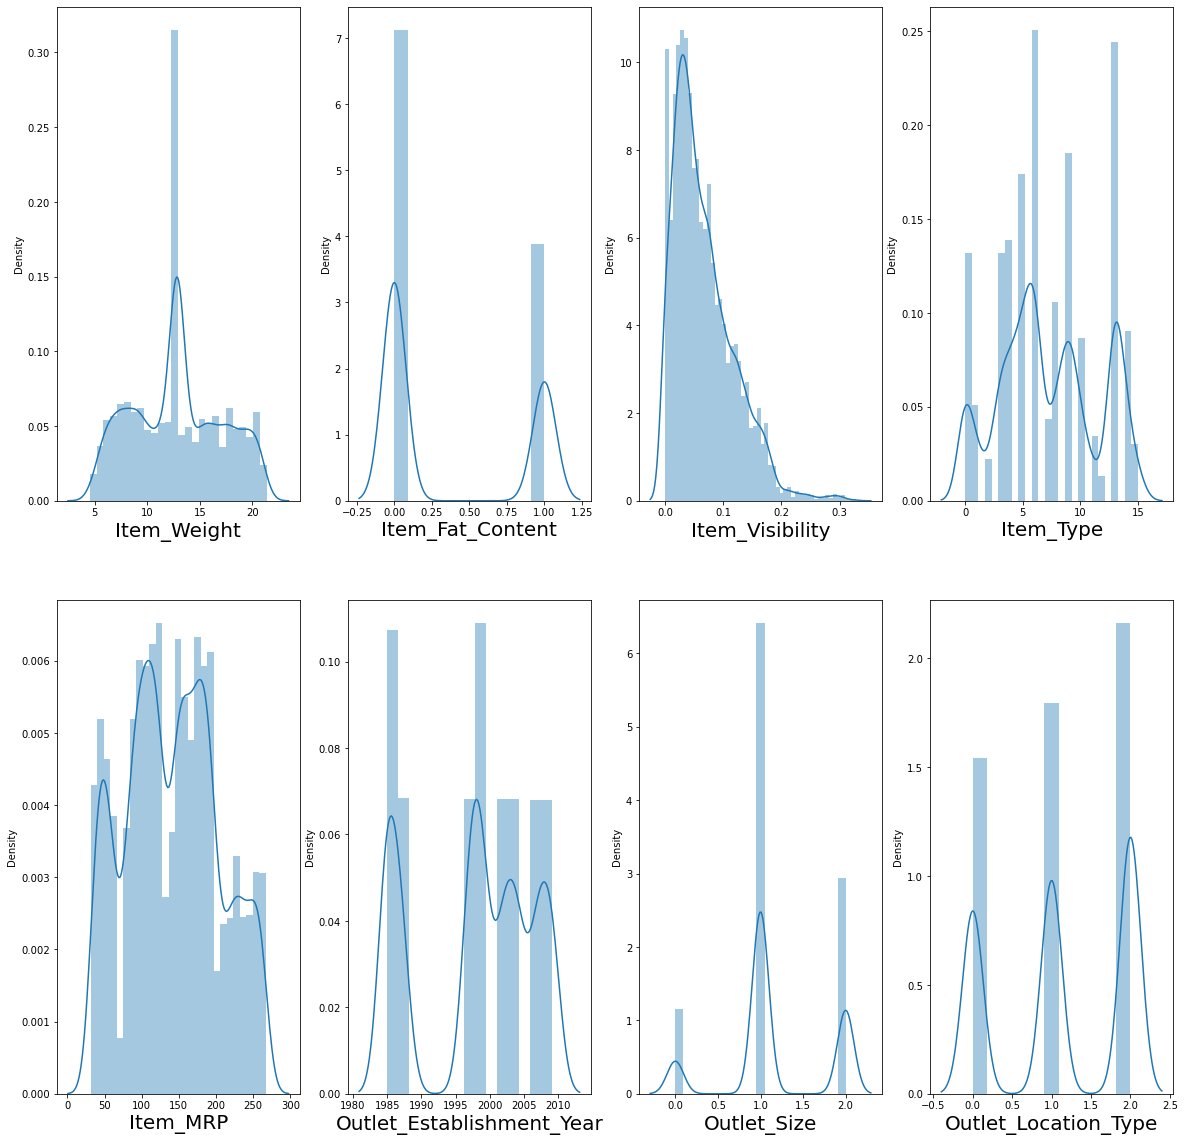

In [24]:
#let's see how data is distributed for every column
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [25]:
#checking skewness
x.skew().sort_values()

Outlet_Establishment_Year   -0.396641
Outlet_Location_Type        -0.209093
Outlet_Size                 -0.087072
Item_Weight                  0.090561
Item_Type                    0.101655
Item_MRP                     0.127202
Item_Fat_Content             0.616705
Outlet_Type                  0.927438
Item_Visibility              1.167091
dtype: float64

skewed columns are categorical so we proceed further

# checking for outliers

In [26]:
x.dtypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
dtype: object

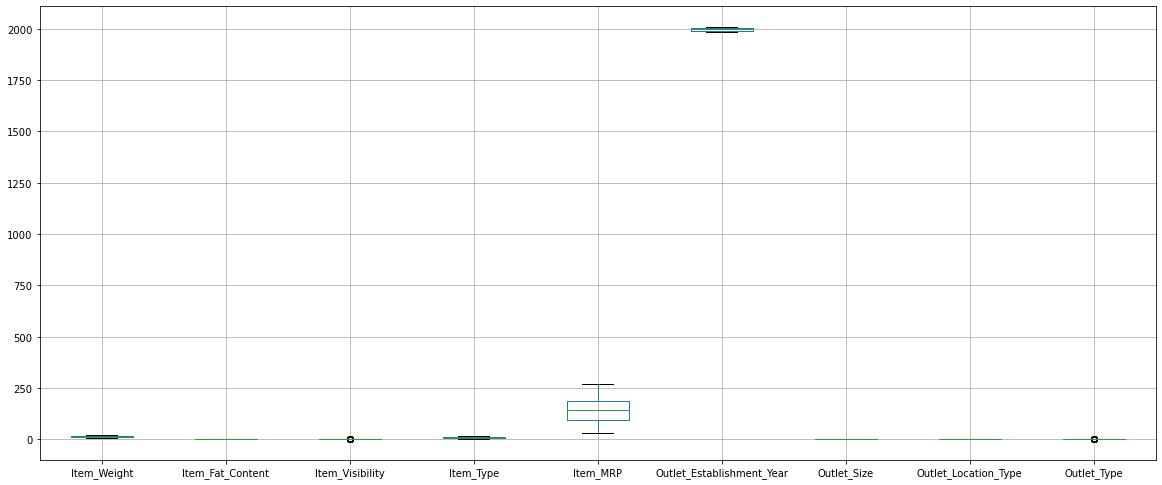

In [27]:
#plotting boxplot for outliers
x.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

we can see no outliers so good to go

# Data Scaling

In [28]:
#data scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [50]:
x_scaled=scaler.fit_transform(x)
x_std=scaler.fit_transform(df_test)

In [51]:
x_scaled

array([[-0.84187169, -0.73814723, -0.97073217, ..., -0.28458121,
        -1.36933384, -0.25265831],
       [-1.64170589,  1.35474328, -0.90811123, ..., -0.28458121,
         1.09156913,  1.00297245],
       [ 1.09855449, -0.73814723, -0.95691733, ..., -0.28458121,
        -1.36933384, -0.25265831],
       ...,
       [-0.53424315, -0.73814723, -0.59978449, ...,  1.38127431,
        -0.13888236, -0.25265831],
       [-1.33644372,  1.35474328,  1.53287976, ..., -0.28458121,
         1.09156913,  1.00297245],
       [ 0.45963367, -0.73814723, -0.41193591, ...,  1.38127431,
        -1.36933384, -0.25265831]])

In [52]:
x_std

array([[ 1.89745979, -0.74081066, -1.13407715, ..., -0.28473712,
        -1.369215  , -0.25276858],
       [-1.03552991,  1.34987258, -0.53185019, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [ 0.44863355, -0.74081066,  0.6613164 , ..., -0.28473712,
         1.0915602 , -1.50799439],
       ...,
       [-0.63504136, -0.74081066,  0.15307374, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [ 0.6135406 ,  1.34987258, -1.28168987, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [-0.75283211,  1.34987258,  0.76171558, ..., -0.28473712,
        -0.1388274 , -0.25276858]])

# Train the model

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [32]:
#finding  best random state
maxAccu=0     #maximum accuracy
maxRS=0       #best random state value for which max accuracy is achieved

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is :",maxAccu,"on Random_state",maxRS)

Best Accuracy is : 0.5361492113395439 on Random_state 3


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=3)

In [34]:
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
#Ajusted r2 score
lr.score(x_train,y_train)*100

49.853189066328916

let's check how well it fits the test data

In [36]:
lr.score(x_test,y_test)

0.5361492113395439

# Cross validation of the model

In [37]:
train_accuracy=lr.score(x_train,y_train)
test_accuracy=lr.score(x_test,y_test)
from sklearn.model_selection import cross_val_score,GridSearchCV
cv_score=cross_val_score(lr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
    

0.5059368501934476

In [38]:
y_pred=lr.predict(x_test)

In [39]:
y_pred

array([2534.43340358, 1333.56829919, 1259.48395104, ..., 4433.91492172,
       2565.00012703, 1245.9642475 ])

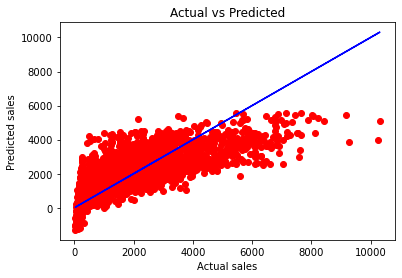

In [40]:
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Actual vs Predicted")
plt.show()

# Ensemble Technique

In [41]:
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [42]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2_score :',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross_val_score :',rfc*100)

R2_score : 57.5646515580569
Cross_val_score : 54.834238603820715


# save the model for later use

In [43]:
import pickle
filename='BIG DATA MART SALES.pkl'
pickle.dump(rf,open(filename,'wb'))

# prediction using trained model

In [54]:
loaded_model=pickle.load(open('BIG DATA MART SALES.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

57.5646515580569


In [55]:
conclusion=pd.DataFrame([loaded_model.predict(df_test)[:],pred_decision[:]],index=["Orignal","Predicted"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5671,5672,5673,5674,5675,5676,5677,5678,5679,5680
Orignal,4237.277702,4531.008688,4544.677562,4263.763226,5065.812538,4530.362862,5503.722514,4957.313770,4577.368342,4546.382010,...,4530.362862,4277.625182,4951.281622,4277.625182,4570.377442,4513.69123,5130.195398,4327.73329,4490.661208,4671.858678
Predicted,2911.843010,1628.273822,703.883760,1976.274166,490.175276,810.877820,1985.748500,1620.377434,1198.719636,1766.480586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
